<a href="https://colab.research.google.com/github/ShaishavMaisuria/CovidBigDataAnalysis/blob/main/Deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Dataset**##

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model   # Defines regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline



In [204]:
df = pd.read_csv("/content/enigma_covid_19_us_states.csv")
df.head()


,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144.0,54743.0,NaN,55887.0,NaN,8.0,NaN,918.0
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147.0,55881.0,NaN,57028.0,NaN,9.0,NaN,920.0
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159.0,56686.0,NaN,57845.0,NaN,11.0,NaN,922.0
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163.0,57444.0,NaN,58607.0,NaN,8.0,NaN,926.0
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164.0,58164.0,NaN,59328.0,NaN,19.0,NaN,927.0


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  object 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11359 non-null  float64
 8   tests_negative  11246 non-null  float64
 9   tests_pending   1259 non-null   float64
 10  tests           11392 non-null  float64
 11  patients_icu    5026 non-null   float64
 12  patients_hosp   8912 non-null   float64
 13  patients_vent   4207 non-null   float64
 14  recovered       8006 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.3+ MB


In [206]:
df.shape

(11619, 15)

In [207]:
df.describe()

,state_fips,lat,long,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
count,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000,11359.000000,1.124600e+04,1259.000000,1.139200e+04,5026.000000,8912.000000,4207.000000,8006.000000
mean,31.845512,37.989736,-84.736642,51838.711507,1931.781995,52674.007043,5.875976e+05,1317.405878,6.474503e+05,311.394349,875.212410,137.394105,24328.162503
std,18.605290,8.413448,46.593479,103280.205868,4391.556990,102747.777003,1.233165e+06,5527.498999,1.325335e+06,561.287900,1668.279399,229.044119,52476.357852
min,1.000000,13.441745,-155.502443,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.000000
25%,17.000000,34.434684,-100.460826,1525.500000,34.000000,1843.500000,3.336300e+04,29.000000,3.367950e+04,56.000000,99.000000,26.000000,1269.250000
50%,31.000000,38.998566,-89.152611,13063.000000,385.000000,14170.000000,1.804030e+05,183.000000,2.050390e+05,134.000000,370.000000,74.000000,5937.000000
75%,46.000000,42.989659,-77.016517,56182.500000,1763.000000,57777.000000,6.036355e+05,623.500000,6.706362e+05,291.000000,884.000000,143.000000,29218.250000
max,78.000000,63.347356,145.601021,817939.000000,32743.000000,807425.000000,1.380612e+07,64400.000000,1.461354e+07,5225.000000,18825.000000,2425.000000,661038.000000


##**Data Preprocessing** ##

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  object 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11359 non-null  float64
 8   tests_negative  11246 non-null  float64
 9   tests_pending   1259 non-null   float64
 10  tests           11392 non-null  float64
 11  patients_icu    5026 non-null   float64
 12  patients_hosp   8912 non-null   float64
 13  patients_vent   4207 non-null   float64
 14  recovered       8006 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.3+ MB


In [209]:
df['state_name'].isnull().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
11614    False
11615    False
11616    False
11617    False
11618    False
Name: state_name, Length: 11619, dtype: bool>

In [210]:
# Replacing null value with 0
df.fillna(0,inplace=True)

In [211]:
# Converting columns to desired data type
df['year']= df['date'].str[0:3].astype(int)
df['month']= df['date'].str[5:7].astype(int)
df['state_name']= df['state_name'].astype('string')
df['lat']= df['lat'].astype(float)
df['long']= df['long'].astype(float)
df['tests_positive']= df['tests_positive'].astype(int)
df['tests_negative']= df['tests_negative'].astype(int)
df['tests_pending']= df['tests_pending'].astype(int)
df['tests']= df['tests'].astype(int)
df['patients_icu']= df['patients_icu'].astype(int)
df['patients_hosp']= df['patients_hosp'].astype(int)
df['patients_vent']= df['patients_vent'].astype(int)
df['recovered']= df['recovered'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  string 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11619 non-null  int64  
 8   tests_negative  11619 non-null  int64  
 9   tests_pending   11619 non-null  int64  
 10  tests           11619 non-null  int64  
 11  patients_icu    11619 non-null  int64  
 12  patients_hosp   11619 non-null  int64  
 13  patients_vent   11619 non-null  int64  
 14  recovered       11619 non-null  int64  
 15  year            11619 non-null  int64  
 16  month           11619 non-null  int64  
dtypes: float64(2), int64(13), objec

In [212]:
df.head()

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,year,month
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144,54743,0,55887,0,8,0,918,202,6
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147,55881,0,57028,0,9,0,920,202,6
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159,56686,0,57845,0,11,0,922,202,6
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163,57444,0,58607,0,8,0,926,202,6
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164,58164,0,59328,0,19,0,927,202,6


##**Data Correlation**##

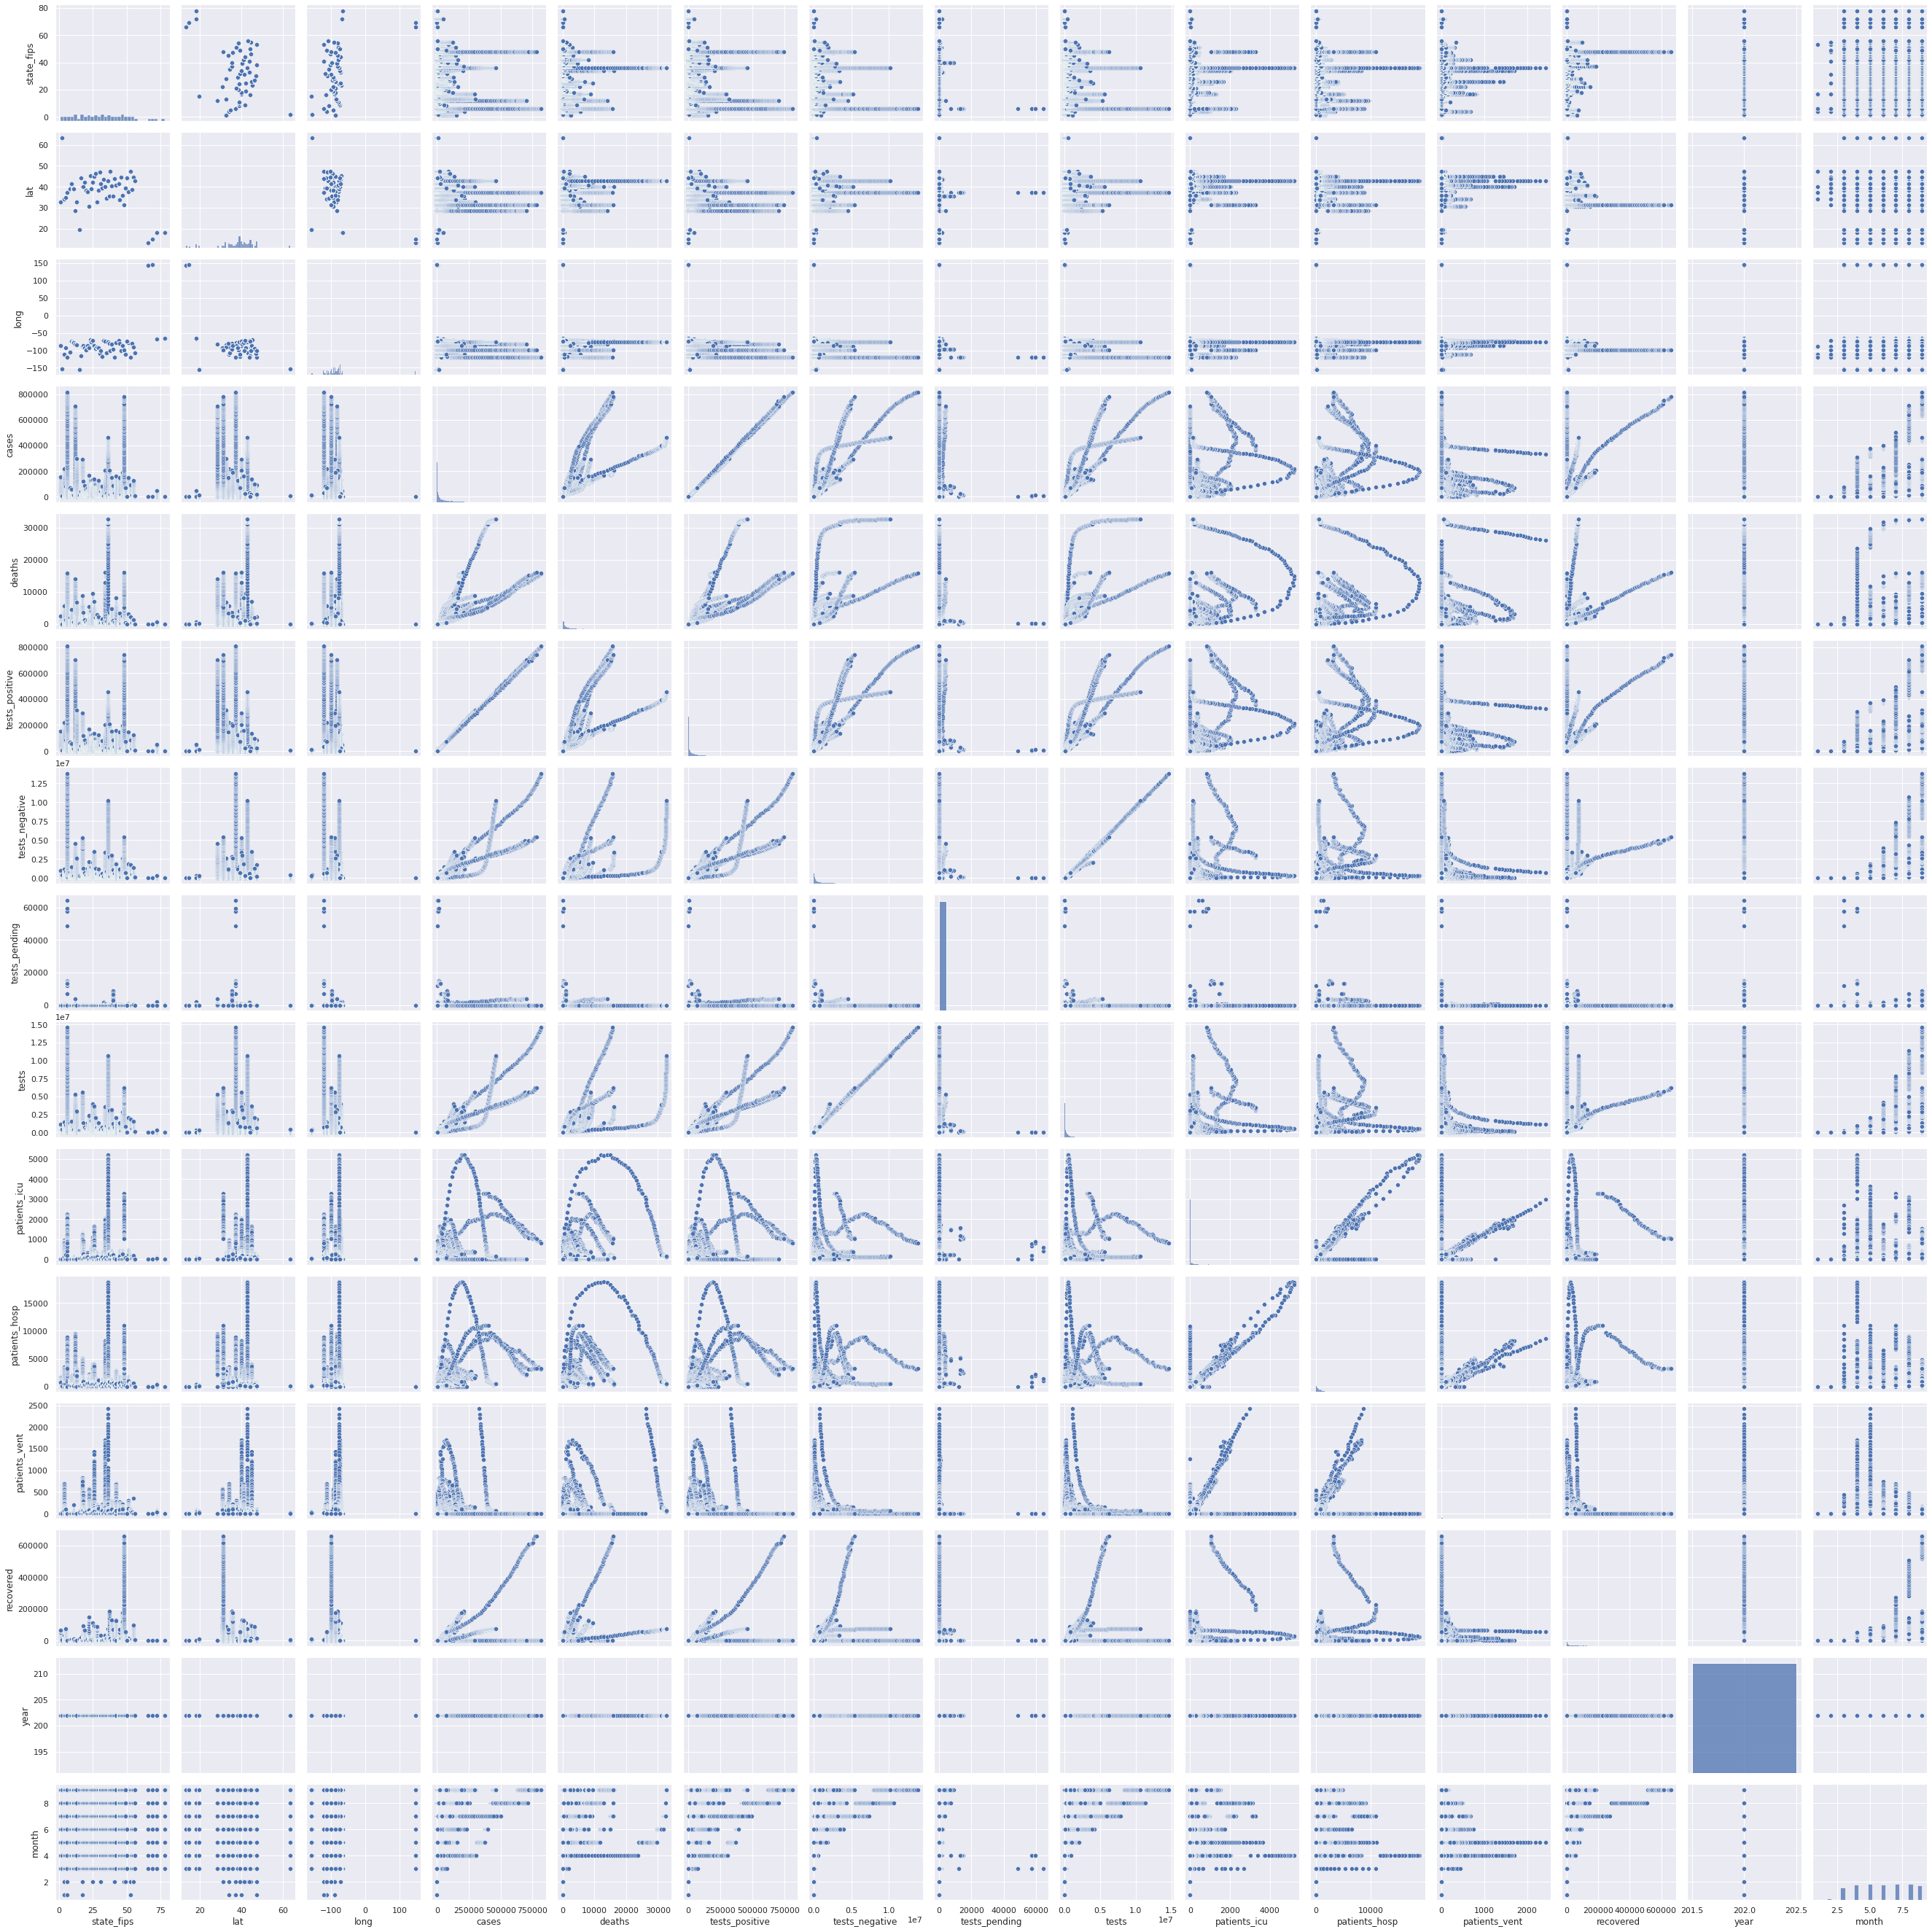

In [213]:
# After loading in our data, we want to create a pairplot with our dataset to see the correlation
# between our independent variables and dependent variables. After creating our pairplot we realized that
# we have way too many independent variables and need to eliminate some to build our models
sns.pairplot(df)

Here, we can see that there is a positive linear relation between cases and tests_positive which should be the case, as more people were getting tested positive, the number of cases were increasing. Another positive linear relation can be seen between tests and tests_negative.

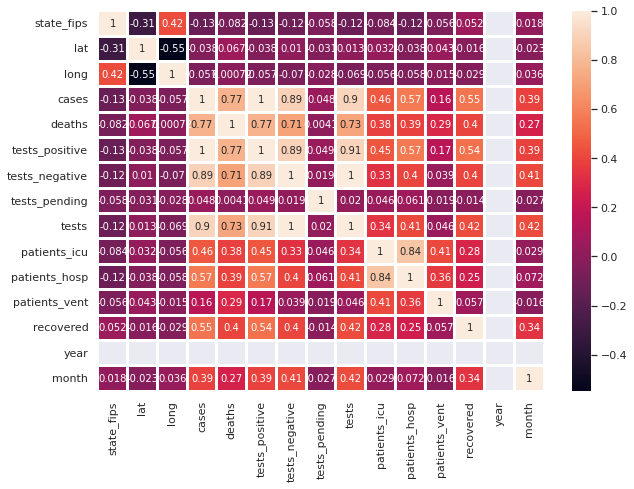

In [214]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

Based on our heatmap, we can see that there is a strong correlation between tests & cases and tests & tests_positive, which means as the number of people getting tested were increasing, more people were getting tested positive and therefore more were the cases. But we also found that tests and tests_negative had a positive linear relation which was a good sign. Another correlation is seen between patients in hospital and patients in icu which tells us that many hospitalised patients needed intensive care.

In [215]:
df.to_csv('shaishav.csv',index=False)

**7)  Analytics, Machine Learning**


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_fips      11619 non-null  int64  
 1   state_name      11619 non-null  string 
 2   lat             11619 non-null  float64
 3   long            11619 non-null  float64
 4   date            11619 non-null  object 
 5   cases           11619 non-null  int64  
 6   deaths          11619 non-null  int64  
 7   tests_positive  11619 non-null  int64  
 8   tests_negative  11619 non-null  int64  
 9   tests_pending   11619 non-null  int64  
 10  tests           11619 non-null  int64  
 11  patients_icu    11619 non-null  int64  
 12  patients_hosp   11619 non-null  int64  
 13  patients_vent   11619 non-null  int64  
 14  recovered       11619 non-null  int64  
 15  year            11619 non-null  int64  
 16  month           11619 non-null  int64  
dtypes: float64(2), int64(13), objec

In [217]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df.loc[ (df['lat'] == 44.0685773) & (df['long'] == -72.6691839)]


,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,year,month
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144,54743,0,55887,0,8,0,918,202,6
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147,55881,0,57028,0,9,0,920,202,6
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159,56686,0,57845,0,11,0,922,202,6
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163,57444,0,58607,0,8,0,926,202,6
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164,58164,0,59328,0,19,0,927,202,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11614,50,Vermont,44.068577,-72.669184,2020-06-14,1127,55,1127,49855,0,50982,0,26,0,909,202,6
11615,50,Vermont,44.068577,-72.669184,2020-06-15,1130,55,1128,51429,0,52557,0,16,0,912,202,6
11616,50,Vermont,44.068577,-72.669184,2020-06-16,1130,55,1131,51759,0,52890,0,12,0,914,202,6
11617,50,Vermont,44.068577,-72.669184,2020-06-17,1130,55,1130,52533,0,53663,0,5,0,915,202,6


In [218]:
df.head()

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,year,month
0,50,Vermont,44.068577,-72.669184,2020-06-19,1144,56,1144,54743,0,55887,0,8,0,918,202,6
1,50,Vermont,44.068577,-72.669184,2020-06-20,1147,56,1147,55881,0,57028,0,9,0,920,202,6
2,50,Vermont,44.068577,-72.669184,2020-06-21,1159,56,1159,56686,0,57845,0,11,0,922,202,6
3,50,Vermont,44.068577,-72.669184,2020-06-22,1163,56,1163,57444,0,58607,0,8,0,926,202,6
4,50,Vermont,44.068577,-72.669184,2020-06-23,1164,56,1164,58164,0,59328,0,19,0,927,202,6


In [219]:
df.columns

Index(['state_fips', 'state_name', 'lat', 'long', 'date', 'cases', 'deaths',
       'tests_positive', 'tests_negative', 'tests_pending', 'tests',
       'patients_icu', 'patients_hosp', 'patients_vent', 'recovered', 'year',
       'month'],
      dtype='object')

In [220]:
  
df1 = df[df.state_fips == 50].reset_index()
df1['date'] = pd.to_datetime(df1['date'], format='%Y/%m/%d')
df1['infected'] = df1['tests_positive'] - df1['recovered'] - df1['deaths'] - df1['tests_pending']
df1 = df1.sort_values(by='date')
df1.index = df1.date
df1['date'] = df1.date.asfreq('D')

In [221]:
df.columns

Index(['state_fips', 'state_name', 'lat', 'long', 'date', 'cases', 'deaths',
       'tests_positive', 'tests_negative', 'tests_pending', 'tests',
       'patients_icu', 'patients_hosp', 'patients_vent', 'recovered', 'year',
       'month'],
      dtype='object')

In [222]:
df1.columns

Index(['index', 'state_fips', 'state_name', 'lat', 'long', 'date', 'cases',
       'deaths', 'tests_positive', 'tests_negative', 'tests_pending', 'tests',
       'patients_icu', 'patients_hosp', 'patients_vent', 'recovered', 'year',
       'month', 'infected'],
      dtype='object')

In [223]:
df1.drop(columns=['index'], inplace=True)

**Modelling & Evaluation**

Training set = 70% Test set = 30%

**Linear Regression**

In [224]:
X = df["state_fips"]
Y = df['deaths']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print (x_train,y_train)

7578     30
5763     21
8973     36
1883     78
669      54
         ..
7813     31
10955    47
905      55
5192     18
235      51
Name: state_fips, Length: 8133, dtype: int64 7578        16
5763       726
8973     32691
1883         6
669         93
         ...  
7813       178
10955      441
905        786
5192      3460
235       2012
Name: deaths, Length: 8133, dtype: int64


In [225]:
model = linear_model.LinearRegression()

In [226]:
# model = linear_model.LogisticRegression()   # Build a training model
import numpy as np


x_train= np.array(x_train).reshape(-1, 1)
y_train= np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

model.fit(x_train, y_train)

LinearRegression()

In [227]:
y_pred = model.predict(x_test)
y = pd.DataFrame(y_pred,columns = ['deaths'])

In [228]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print("R2 score :--->>",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

Coefficients: [[-18.42870051]]
Intercept: [2538.13274545]
Mean squared error (MSE): 17986723.71
Coefficient of determination (R^2): 0.01
R2 score :--->> 0.0084258287749297
MSE 17986723.709827464
MAE 2307.2962012902526


In [229]:
# This values of X and Y will be same of rest of the models
X = df.drop(['deaths','state_name','date','year','month'], axis=1)
Y = df['deaths']
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3, random_state=1)



**The Random Forest Regresssor**

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

#Build the rantdom forest classifier
rf=RandomForestRegressor(random_state=1)
#fit the training set data 
rf.fit(x_train, y_train)
#make the prediction on the train set 
y_pred_test=rf.predict(x_test)

print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))


MSE 17986723.709827464
MAE 2307.2962012902526


In [231]:
from sklearn.ensemble import BaggingRegressor
model_Bagging = BaggingRegressor()
model_Bagging.fit(x_train, y_train)
y_pred_test=model_Bagging.predict(x_test)

#Evaluation
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))
print("R2 score :--->>",r2_score(y_test,y_pred_test))
print("MSE",mean_squared_error(y_test,y_pred_test))
print("MAE",mean_absolute_error(y_test,y_pred_test))

Mean squared error (MSE): 8164.82
Coefficient of determination (R^2): 1.00
R2 score :--->> 0.9995498890196148
MSE 8164.817194607002
MAE 26.02410212277683


**LogisticRegression**

In [232]:
model_Logistic= linear_model.LogisticRegression()   # Build a training model
model_Logistic.fit(x_train, y_train)

y_pred = model_Logistic.predict(x_test)
y = pd.DataFrame(y_pred,columns = ['deaths'])

print('Coefficients:', model_Logistic.coef_)
print('Intercept:', model_Logistic.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print("R2 score :--->>",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))



Coefficients: [[ 1.11434254e-06  1.35359711e-06 -3.22129044e-06 ... -2.72616712e-08
  -3.04935265e-09 -5.18138592e-07]
 [ 2.29783420e-07  2.26155376e-07 -4.55246159e-07 ... -1.76334494e-08
  -3.14065213e-09 -4.74889970e-07]
 [ 5.20352599e-07  2.07189536e-07  6.04601480e-07 ... -7.39869371e-08
  -6.37809102e-09 -1.79657594e-06]
 ...
 [-5.16955034e-09 -6.89507270e-09  1.70079945e-08 ... -2.65097171e-07
  -8.41365765e-09 -3.46664148e-06]
 [-5.18133668e-09 -6.91494073e-09  1.70542301e-08 ... -2.65452997e-07
  -9.24503437e-09 -3.48699596e-06]
 [-5.18871479e-09 -6.92744229e-09  1.70835422e-08 ... -2.66048678e-07
  -9.35647290e-09 -3.49931294e-06]]
Intercept: [ 3.48104681e-08  6.20054768e-09  9.16388431e-09 ... -1.85953253e-10
 -1.86442587e-10 -1.86752031e-10]
Mean squared error (MSE): 153777430.53
Coefficient of determination (R^2): -7.48
R2 score :--->> -7.477459858381966
MSE 153777430.53298908
MAE 8469.282271944923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [233]:
df.columns

Index(['state_fips', 'state_name', 'lat', 'long', 'date', 'cases', 'deaths',
       'tests_positive', 'tests_negative', 'tests_pending', 'tests',
       'patients_icu', 'patients_hosp', 'patients_vent', 'recovered', 'year',
       'month'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 0.92, 'K Means')

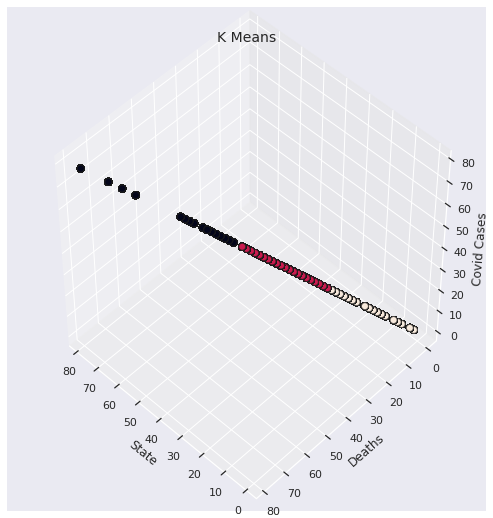

In [234]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets


X2 = df["state_fips"]
Y2 = df['deaths']
X2= np.array(X2).reshape(-1, 1)
Y2= np.array(Y2).reshape(-1, 1)
#KMeans
km = KMeans(n_clusters=3)
km.fit(X2)
km.predict(X2)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X2[:, 0], X2[:, 0], X2[:, 0],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("State")
ax.set_ylabel("Deaths")
ax.set_zlabel("Covid Cases")
plt.title("K Means", fontsize=14)




Future Work, Comments - students may want to consider the following questions

#What was unique about the data?  
#Did you have to deal with imbalance? 
#What data cleaning did you do? Outlier treatment?  Imputation?
- Something which we found unique about this data was it was more of a live data with the covid data still flowing in till date. 
-Data consists of missing values where the we handled it using filling missing values with 0, avoiding any possible loss of the data. 
- In addition,Converting columns to desired data type in order to use in our models. such as date format was initial in string format but we converted to date type object.
- Although data was present in decimal format, we had to explicitly change it to Float value as python was not able to read it initially.


#Did you create any new additional features / variables?
Yes, we created infected columns where we calculate the total number of actual infected cases by removing 
tests_positive,recovered, deaths, tests_pending

#What was the process you used for evaluation?  What was the best result?
Process -
We used several metrics for evaluation such as-
R squared value
Mean Absolute Error
Mean Squared Error


#What were the problems you faced? How did you solve them?
 
- As there were too many datasets available we were not able to decide which dataset would be perfect for us to work upon.
- Data cleaning took lot of time.
- Analysing which model would fit our project.
- Finding correct ways to work around with a particular machine learning algorithm (syntactical errors)


#What future work would you like to do? 
For future work
- We are planning to build a live dashboard which will give us real time analysis.
- We will also try to predict in which country the cases are rising at an alarming rate.
- Try to get more data so as to remove outliers.
- Lastly, get more insights about covid cases.


#Instructions for individuals that may want to use your work
- The folks who want to use our project should consider checking the amazon data lakes as the data keeps evolving so based on that implement most recent dataset, in addition, for making any possible selection for the model one can implement various visualization to know indepth understanding of why and how the model selections was done by using dashboard through aws quicksight. 